In [24]:
from neuralprophet import NeuralProphet
import pandas as pd

In [25]:
df = pd.read_csv(
    'owid-covid-data.csv',
)

In [26]:
df = (
    df
    [
        df
        ['iso_code'] 
        == 'NLD'
    ]
    [
        [
            'date',
            'new_cases',
        ]
    ]
)
(
    df
    .rename(
        columns={
            "date": "ds",
            "new_cases": "y"
        },
        inplace=True,
    )
)
df['y'] = (
    df
    ['y']
    .rolling(7)
    .mean()
)

In [27]:
df

ds             y
87917  2020-02-27           NaN
87918  2020-02-28           NaN
87919  2020-02-29           NaN
87920  2020-03-01           NaN
87921  2020-03-02           NaN
...           ...           ...
88561  2021-12-02  21569.142857
88562  2021-12-03  21604.428571
88563  2021-12-04  21687.142857
88564  2021-12-05  21823.285714
88565  2021-12-06  21753.428571

[649 rows x 2 columns]

In [28]:
m = NeuralProphet()

In [29]:
metrics = m.fit(
    df,
    freq="D",
)

INFO - (NP.forecaster._handle_missing_data) - dropped 6 NAN row in 'y'
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 201


  0%|          | 0/240 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.77E-02, min: 1.01E+00


  0%|          | 0/240 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.87E-02, min: 1.10E+00


  0%|          | 0/240 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.08E-02, min: 1.10E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.45E-02
Epoch[201/201]: 100%|██████████| 201/201 [00:20<00:00,  9.64it/s, SmoothL1Loss=0.0259, MAE=1.68e+3, RMSE=2.44e+3, RegLoss=0]


In [30]:
forecast = m.predict(
    df,
)

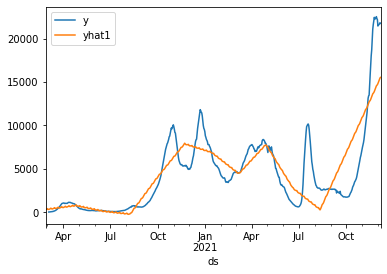

In [31]:
(
    forecast
    .plot(
        x='ds',
        y=[
            'y',
            'yhat1',
        ],
    )
)